## Case Study: Automobile pricing

### Problem Statement
This dataset consist of data From 1985 Ward's Automotive Yearbook. Here are the sources

Sources:

1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038
3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

Content
This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [37]:
df = pd.read_csv(r'Automobile.csv')

In [38]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [39]:
df.dtypes

symboling                int64
normalized_losses        int64
make                    object
fuel_type               object
aspiration              object
number_of_doors         object
body_style              object
drive_wheels            object
engine_location         object
wheel_base             float64
length                 float64
width                  float64
height                 float64
curb_weight              int64
engine_type             object
number_of_cylinders     object
engine_size              int64
fuel_system             object
bore                   float64
stroke                 float64
compression_ratio      float64
horsepower               int64
peak_rpm                 int64
city_mpg                 int64
highway_mpg              int64
price                    int64
dtype: object

In [40]:
df.shape

(201, 26)

In [41]:
df.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'number_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'number_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [42]:
### EDA of the target variable

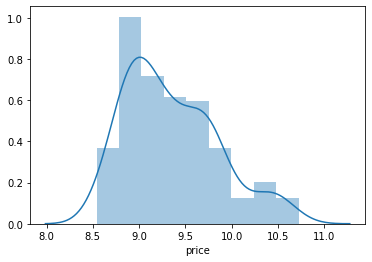

In [43]:
sns.distplot(np.log(df['price']))

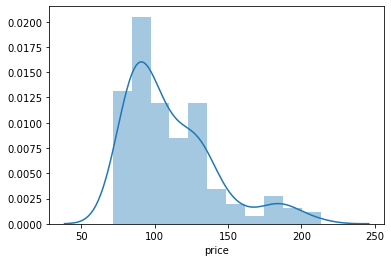

In [44]:
sns.distplot(np.sqrt(df['price']))

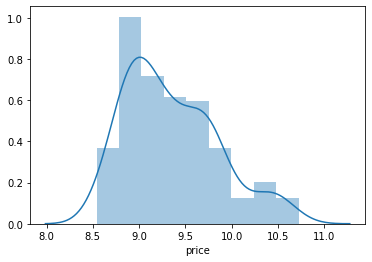

In [45]:
sns.distplot(np.log(df['price']))

In [46]:
num_cols = df.dtypes[df.dtypes != 'object'].index.tolist()
obj_cols = df.dtypes[df.dtypes == 'object'].index.tolist()

In [47]:
df[num_cols].head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [48]:
df.shape

(201, 26)

<Figure size 1440x1440 with 0 Axes>

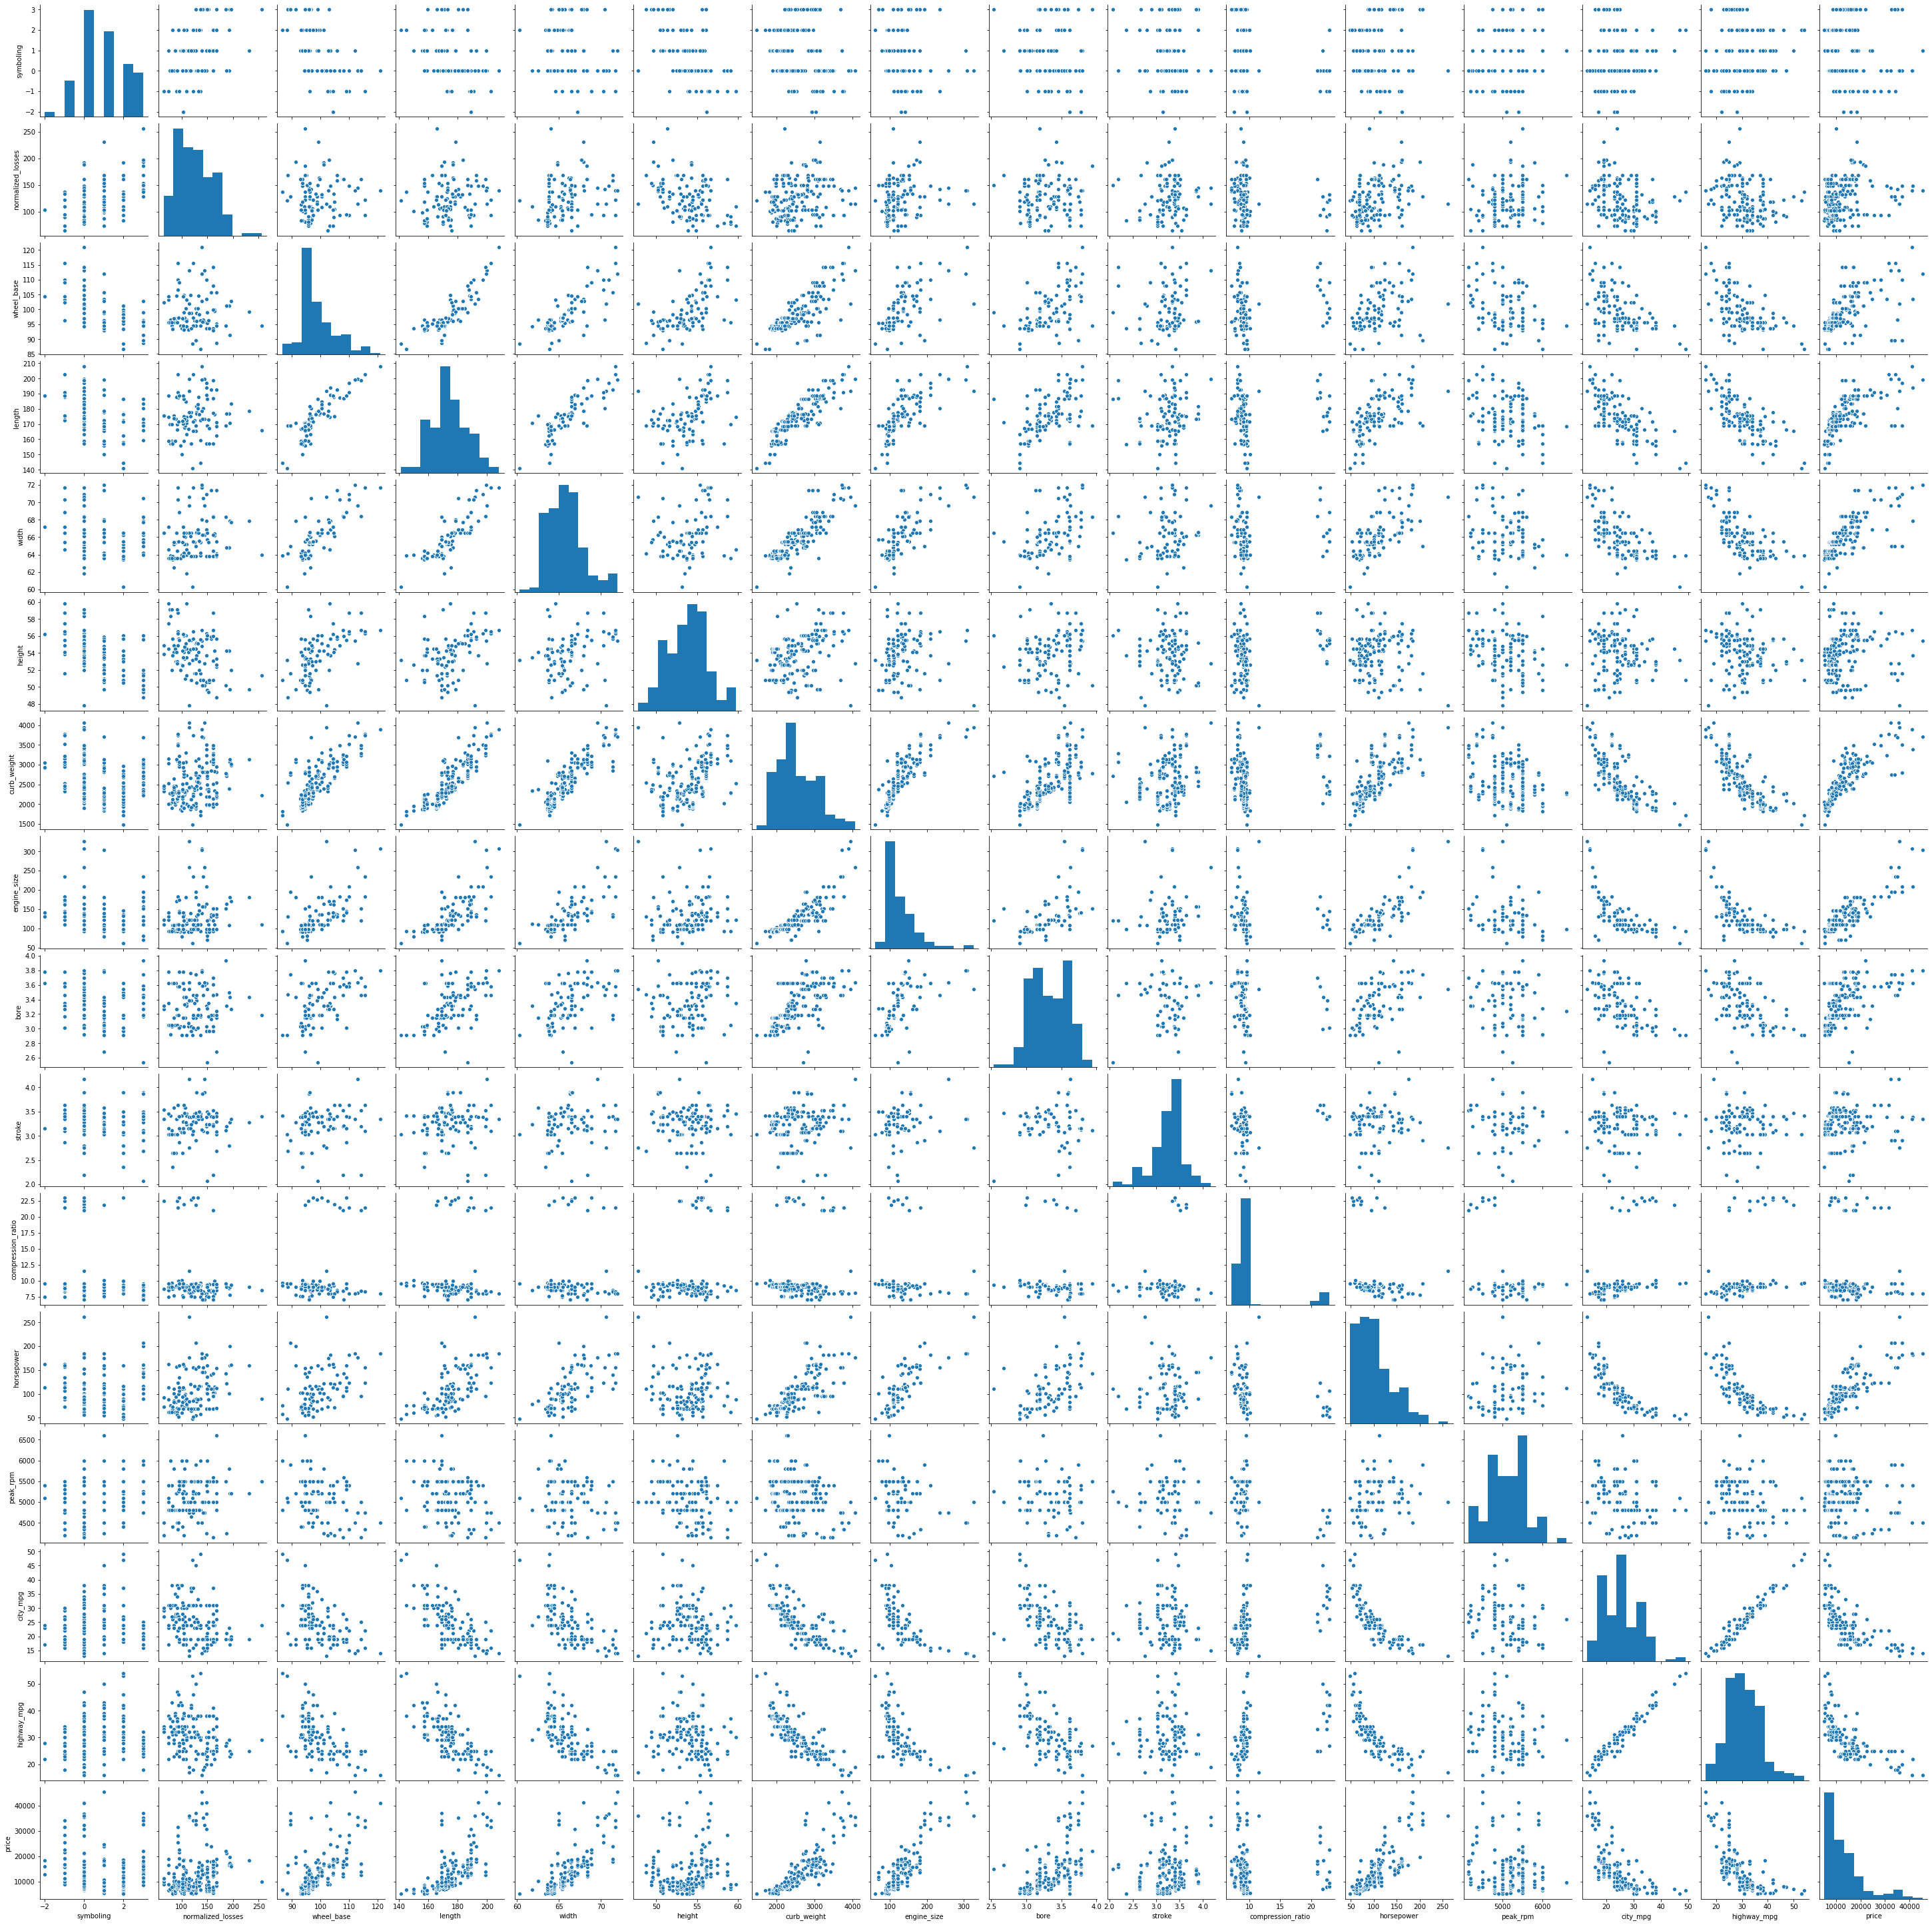

In [49]:
plt.figure(figsize = (20,20))
sns.pairplot(df[num_cols])

In [50]:
print(num_cols)

['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']


In [51]:
disc_cols = ['symboling', 'compression_ratio', 'peak_rpm']

In [52]:
cat_cols = disc_cols + obj_cols
print(cat_cols)

['symboling', 'compression_ratio', 'peak_rpm', 'make', 'fuel_type', 'aspiration', 'number_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'number_of_cylinders', 'fuel_system']


In [54]:
num_cols_cont = [i for i in num_cols if i not in disc_cols]
num_cols_cont_X = num_cols_cont[:-1]
print(num_cols_cont_X)

['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'horsepower', 'city_mpg', 'highway_mpg']


In [70]:
def bivariate_cont_cont(x,y, df):
    
    plt.scatter(x=x,y=y, data = df)
    
    corr = round(df[[x,y]].corr().iloc[0,1],3)
    
    plt.title('{} \n corr = {}'.format(x, corr), fontsize = 15)

In [71]:
print('{} \n '+ 'corr = {}')

{} 
 corr = {}


In [72]:
def plot_scatter_cont_cols(df, cont_cols_X, y):
    
    c = 3
    if len(cont_cols_X)%3 == 0:
        r = len(cont_cols_X)/3
    else:
        r = int(len(cont_cols_X)/3)+1
        
    r = int(r)
    
    plt.rcParams["figure.figsize"] = [17, 20]
    # plt.subplots(figsize=(10, 8))
    plt.rcParams["figure.autolayout"] = True

    count = 1
    for i in range(len(cont_cols_X)):
        plt.subplot(r,c,count)
        bivariate_cont_cont(cont_cols_X[i], y, df)
        count+=1

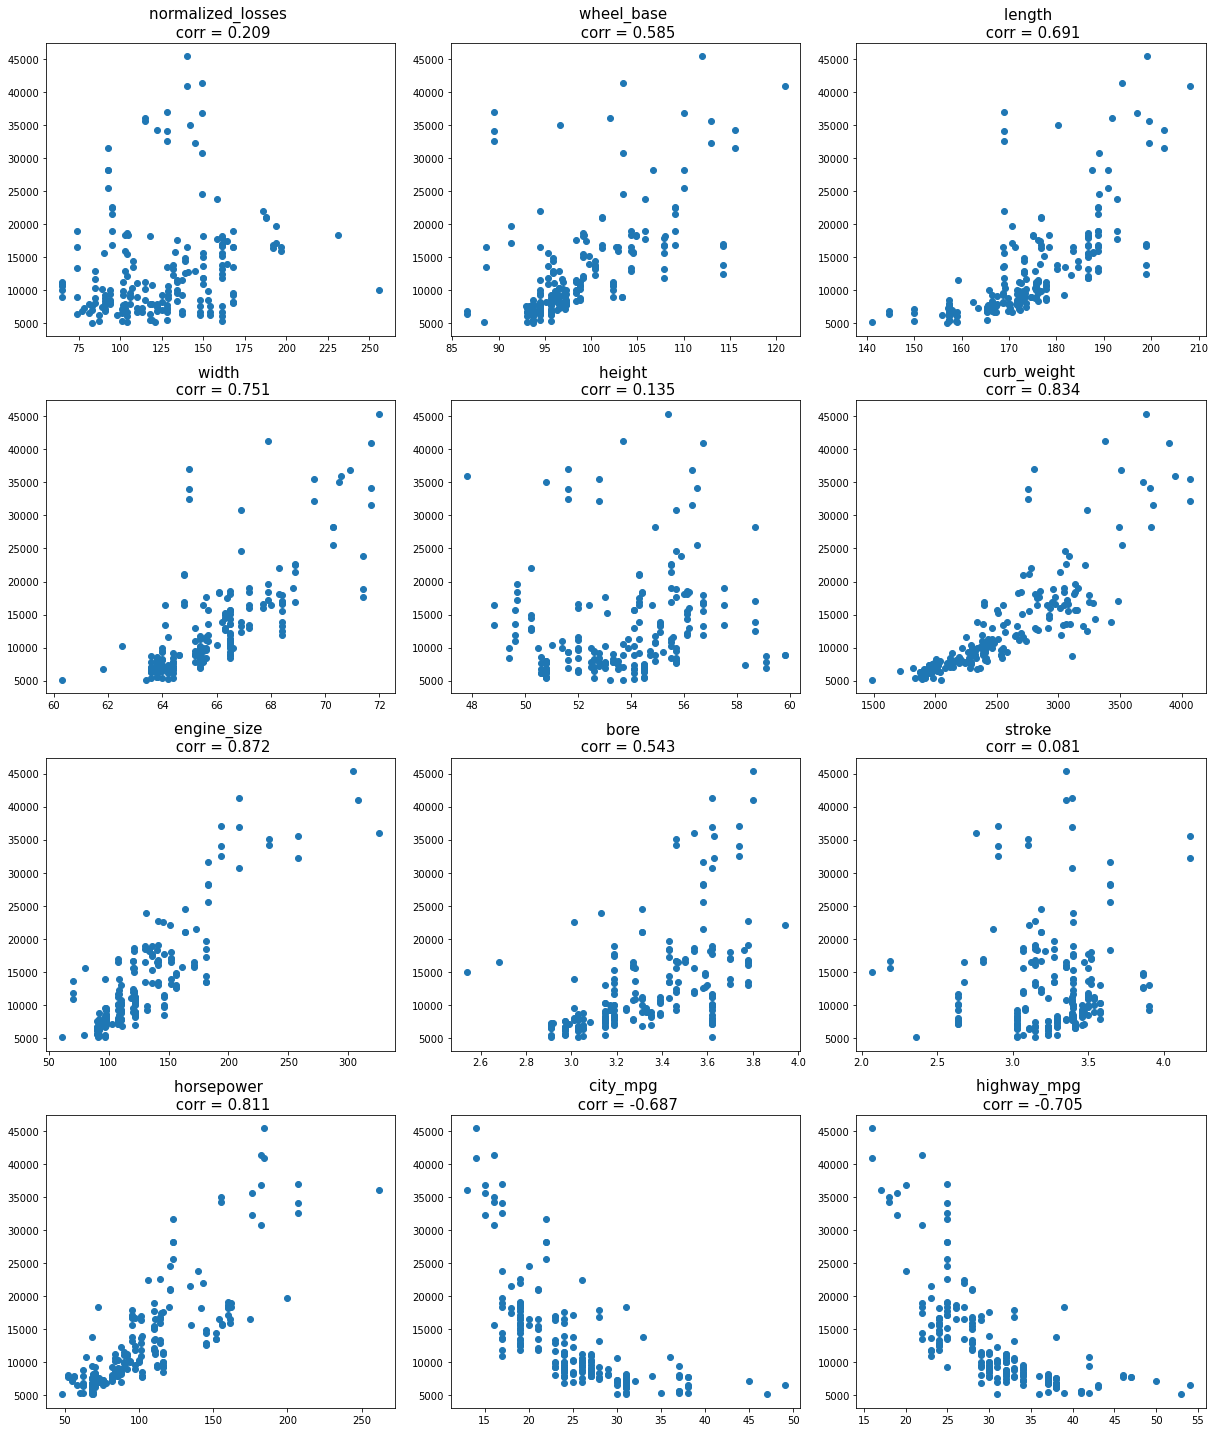

In [73]:
plot_scatter_cont_cols(df, num_cols_cont_X, 'price')

In [105]:
# def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
#     '''
#     takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
#     '''
#     from numpy import sqrt, abs, round
#     from scipy.stats import norm
#     ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
#     z = (X1 - X2)/ovr_sigma
#     pval = 2*(1 - norm.cdf(abs(z)))
#     return pval

In [106]:
# def TwoSampT(X1, X2, sd1, sd2, n1, n2):
#     '''
#     takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
#     '''
#     from numpy import sqrt, abs, round
#     from scipy.stats import t as t_dist
#     ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
#     t = (X1 - X2)/ovr_sd
#     df = n1+n2-2
#     pval = 2*(1 - t_dist.cdf(abs(t),df))
#     return pval

In [107]:
# def Bivariate_cont_cat(data, cont, cat, category):
#   #creating 2 samples
#     x1 = data[cont][data[cat]==category][:]
#     x2 = data[cont][~(data[cat]==category)][:]

#     #calculating descriptives
#     n1, n2 = x1.shape[0], x2.shape[0]
#     m1, m2 = x1.mean(), x2.mean()
#     std1, std2 = x1.std(), x2.mean()

#     #calculating p-values
#     t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
#     z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

#     #table
#     table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

#     #plotting
#     plt.figure(figsize = (15,6), dpi=140)

#     #barplot
#     plt.subplot(1,2,1)
#     sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
#     plt.ylabel('mean {}'.format(cont))
#     plt.xlabel(cat)
#     plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
#                                                                 z_p_val,
#                                                                 table))

#     # boxplot
#     plt.subplot(1,2,2)
#     sns.boxplot(x=cat, y=cont, data=data)
#     plt.title('categorical boxplot')

In [76]:
def bva_cat_cols(df, cat_cols_X, y, graph_type):
    
    c = 3
    if len(cat_cols_X)%c == 0:
        r = len(cat_cols_X)/c
    else:
        r = int(len(cat_cols_X)/c)+1
        
    r = int(r)

    plt.rcParams["figure.figsize"] = [17, 20]
    plt.rcParams["figure.autolayout"] = True

    count = 1
    for i in range(len(cat_cols_X)):
        plt.subplot(r,c,count)
        
        if graph_type == 'bar':
            sns.barplot(x=cat_cols_X[i], y=y, data = df)# by default it gives mean # estimator = np.median
        elif graph_type == 'box':
            sns.boxplot(x=cat_cols_X[i], y=y, data = df)
            
        count+=1

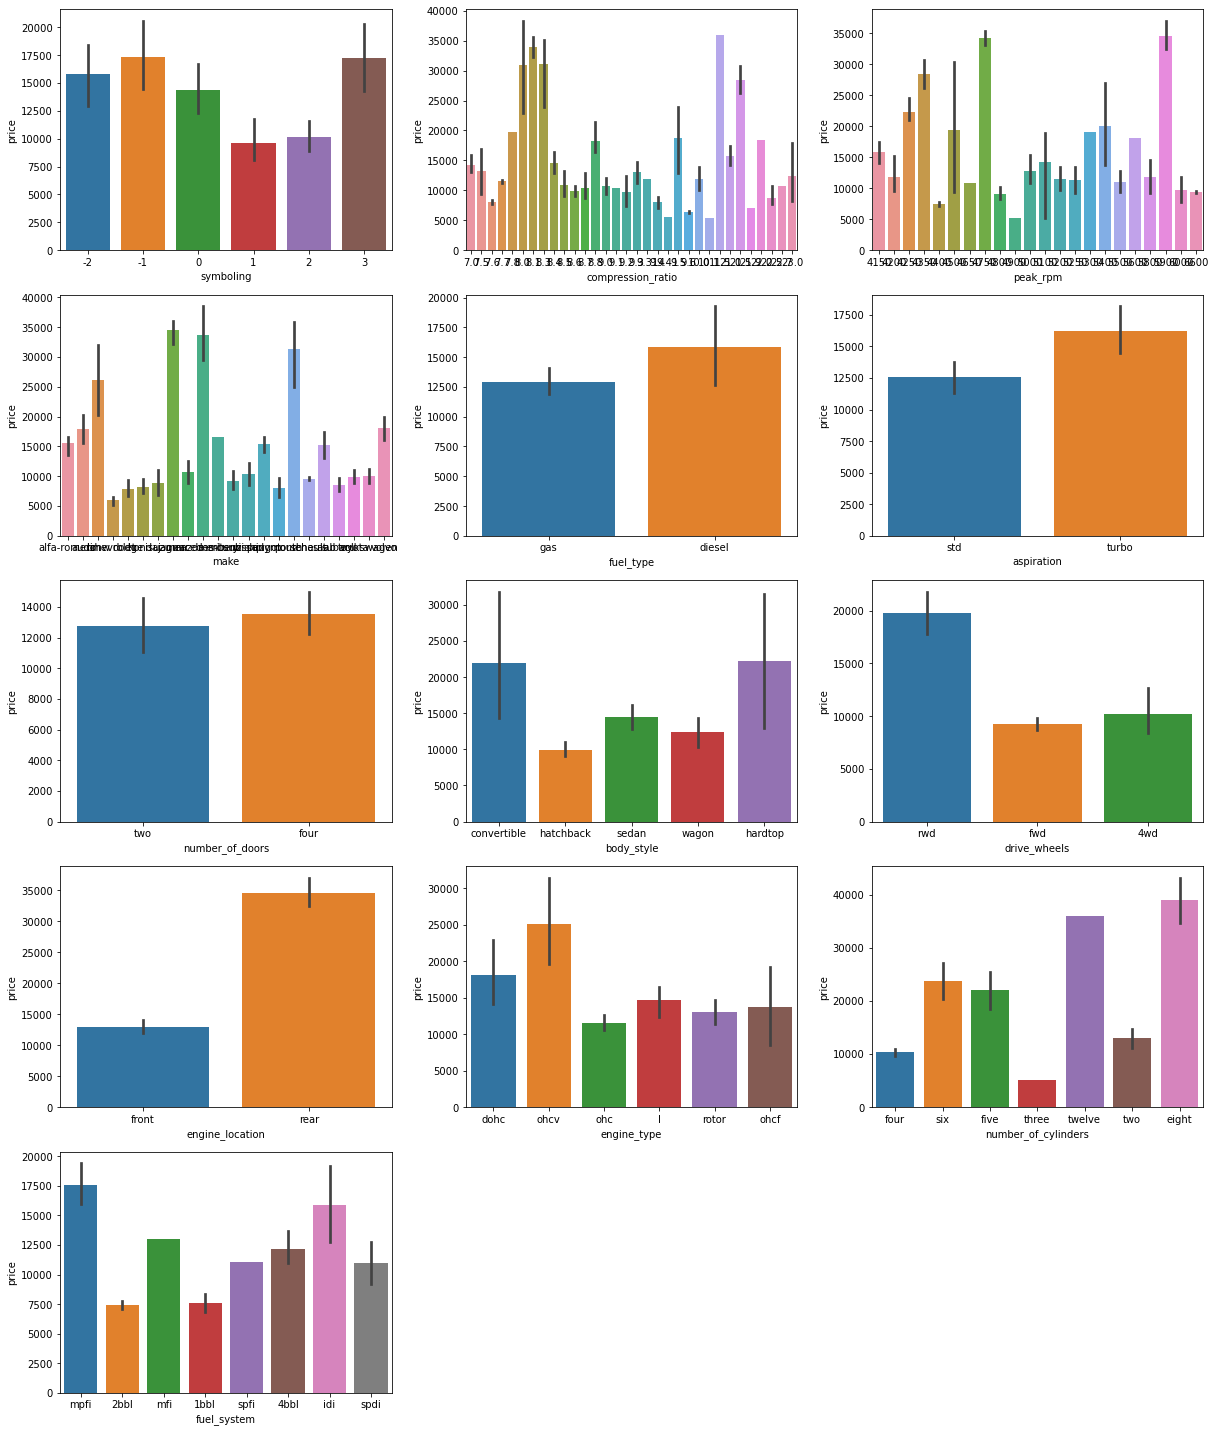

In [78]:
bva_cat_cols(df, cat_cols, 'price', 'bar')

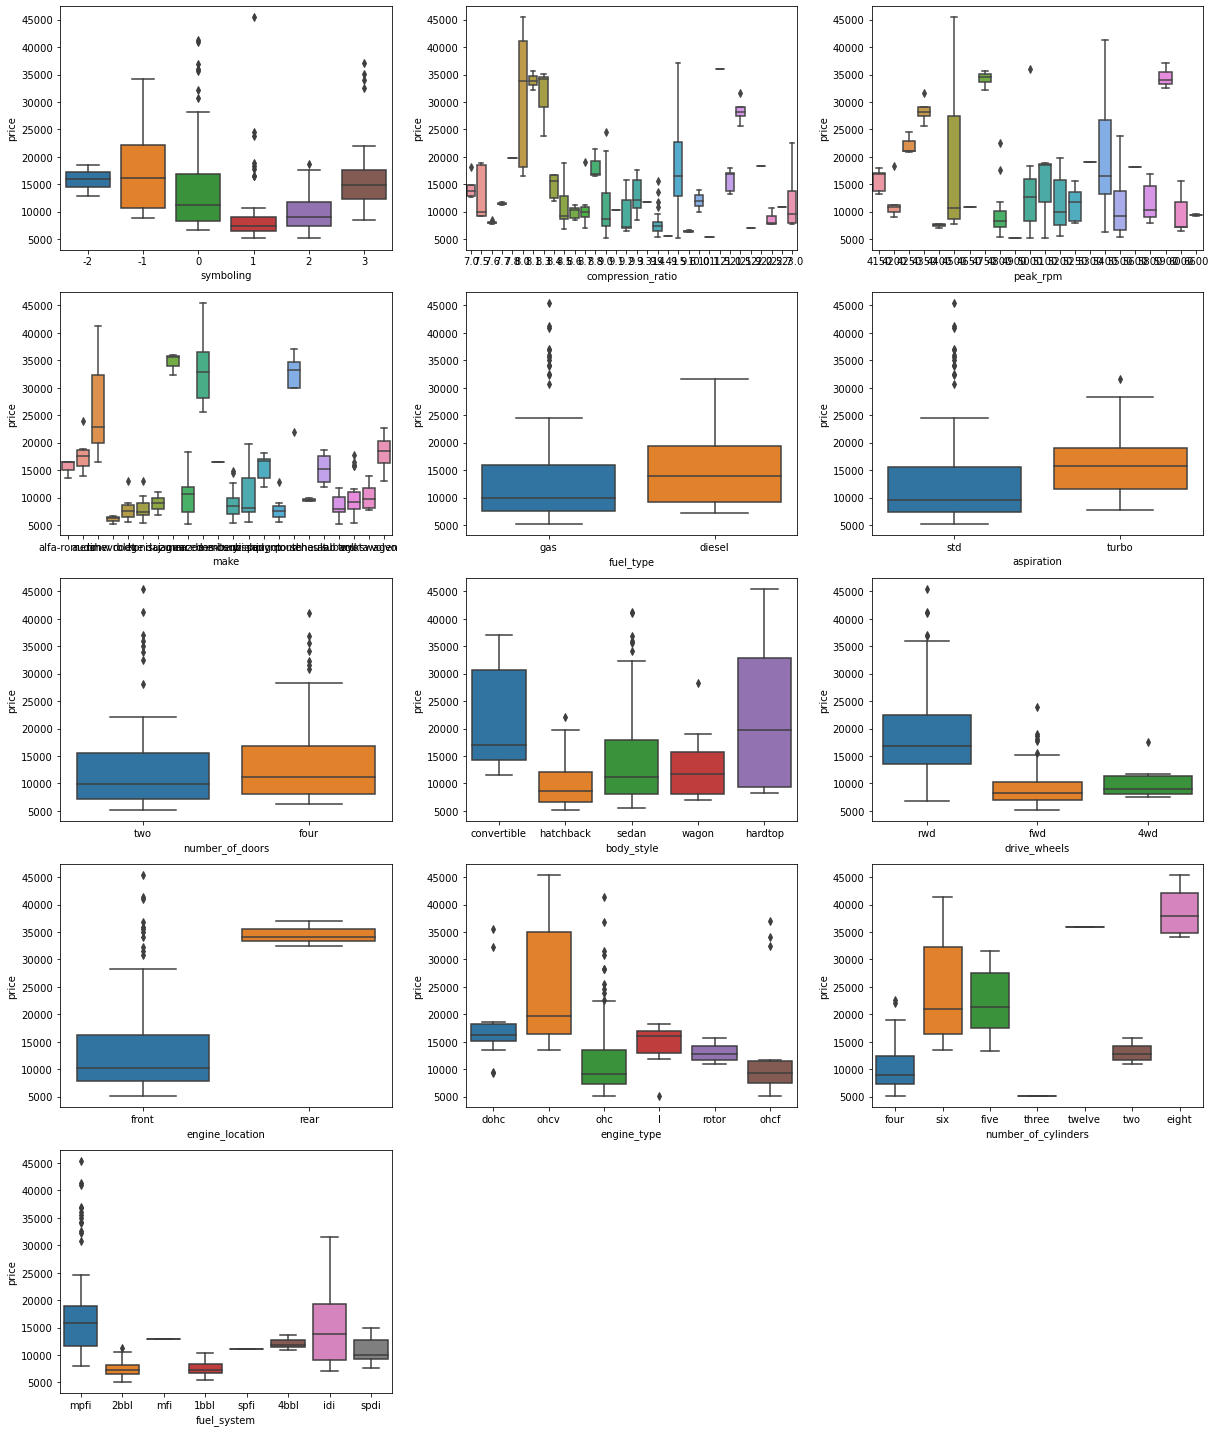

In [80]:
bva_cat_cols(df, cat_cols, 'price', 'box')

In [86]:
df[df['number_of_cylinders'] == 'twelve']

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
46,0,115,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000


In [87]:
df[df['number_of_cylinders'] == 'three']

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
17,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151


In [133]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [88]:
X = df.drop(['price'], axis = 1)
X = X.drop(obj_cols, axis = 1) # need to convert obj cols to cat numbers

In [145]:
mod = smf.ols(formula='price ~ X', data=df)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     68.89
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           2.76e-67
Time:                        17:24:38   Log-Likelihood:                -1900.4
No. Observations:                 201   AIC:                             3833.
Df Residuals:                     185   BIC:                             3886.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.616e+04   1.67e+04     -3.364      0.0

In [89]:
from pandas_profiling import ProfileReport
# pip install pandas_profiling --> in anacondqa prompt

In [90]:
profile = ProfileReport(df)

In [ ]:
profile.to_file("automobile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]